# load_data

In [54]:
import numpy as np
import pandas as pd

In [55]:
asset_details = pd.read_csv('./data/asset_details.csv')
asset_details_df = asset_details.copy()
dt = pd.read_csv('./data/train.csv')
df = dt.copy()

# fillna

In [56]:
dt.tail()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN
24236805,1632182400,11,48.0,232.695000,232.800000,232.240000,232.275000,1.035123e+02,232.569697,NaN


In [57]:
df1 = df.copy()
df1.isna().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [58]:
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1.isna().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP             16
Target       750338
dtype: int64

In [59]:
df1.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [60]:
def log_return_ahead(series, periods=15):
    return np.exp(-np.log(series).diff(periods=-periods).shift(-1)) - 1

df_change = pd.DataFrame()
for i in asset_details_df.Asset_ID:
    X = df1[df1.Asset_ID==i]
    X = X.reset_index(drop=True)
    X['Target2']=log_return_ahead(X.Close)[1:]
    df_change = pd.concat([df_change, X])
df_change['Target3'] = np.where(df_change.Target.isna(), df_change.Target2, df_change.Target)

In [61]:
# check
df_change.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Target2,Target3
0,1514764860,2,40.0,2376.580000,2399.5,2357.14,2374.590000,19.233005,2373.116392,-0.004218,NaN,-0.004218
1,1514764920,2,53.0,2374.553333,2400.9,2354.20,2372.286667,24.050259,2371.434498,-0.004079,-0.004079,-0.004079
2,1514764980,2,61.0,2371.633333,2401.9,2353.70,2372.063333,42.676438,2375.442755,-0.002892,-0.002892,-0.002892
3,1514765040,2,95.0,2376.060000,2406.4,2344.00,2370.566667,37.820918,2371.096152,-0.003718,-0.003718,-0.003718
4,1514765100,2,33.0,2372.656667,2404.6,2343.40,2370.173333,8.519679,2370.345730,-0.002171,-0.002171,-0.002171


In [62]:
df_change = df_change.drop(['Target', 'Target2'], axis=1)

In [63]:
df_change.isna().sum()

timestamp      0
Asset_ID       0
Count          0
Open           0
High           0
Low            0
Close          0
Volume         0
VWAP          16
Target3      227
dtype: int64

# time fitting

In [64]:
# check
for i in range(14):
    print(i, df_change[df_change.Asset_ID == i].shape)

0 (1942619, 10)
1 (1956282, 10)
2 (1953537, 10)
3 (1791867, 10)
4 (1156866, 10)
5 (1955140, 10)
6 (1956200, 10)
7 (1951127, 10)
8 (1592071, 10)
9 (1956030, 10)
10 (670497, 10)
11 (1701261, 10)
12 (1778749, 10)
13 (1874560, 10)


In [65]:
# to datetime
df_change['timestamp'] = pd.to_datetime(df_change['timestamp'], unit='s')
df_change.index = df_change['timestamp']
df_change.drop('timestamp', axis=1, inplace=True)
df_change.head(2)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target3
timestamp,,,,,,,,,
2018-01-01 00:01:00,2,40.0,2376.580000,2399.5,2357.14,2374.590000,19.233005,2373.116392,-0.004218
2018-01-01 00:02:00,2,53.0,2374.553333,2400.9,2354.20,2372.286667,24.050259,2371.434498,-0.004079


In [66]:
df_change.tail()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target3
timestamp,,,,,,,,,
2021-09-20 23:56:00,4,483.0,0.208072,0.20820,0.207294,0.207445,1.895146e+06,0.207764,NaN
2021-09-20 23:57:00,4,394.0,0.207461,0.20754,0.206800,0.206920,1.059219e+06,0.207244,NaN
2021-09-20 23:58:00,4,297.0,0.206892,0.20710,0.206600,0.206797,4.201725e+05,0.206832,NaN
2021-09-20 23:59:00,4,980.0,0.206821,0.20880,0.206784,0.208621,2.583981e+06,0.207613,NaN
2021-09-21 00:00:00,4,537.0,0.208622,0.20880,0.208200,0.208294,1.140946e+06,0.208515,NaN


In [67]:
# check time start by asset
df_change.reset_index().groupby('Asset_ID')['timestamp'].min()

Asset_ID
0    2018-01-01 00:01:00
1    2018-01-01 00:01:00
2    2018-01-01 00:01:00
3    2018-04-17 09:11:00
4    2019-04-12 14:34:00
5    2018-01-01 00:01:00
6    2018-01-01 00:01:00
7    2018-01-01 00:01:00
8    2018-05-09 08:07:00
9    2018-01-01 00:01:00
10   2018-05-10 15:21:00
11   2018-01-01 00:01:00
12   2018-02-16 23:53:00
13   2018-02-06 21:37:00
Name: timestamp, dtype: datetime64[ns]

In [68]:
fittime_df = df_change[df_change.index >= '2019-04-12 14:34:00']
fittime_df.head(2)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target3
timestamp,,,,,,,,,
2019-04-12 14:34:00,2,76.0,282.343333,283.54,280.64,282.480000,143.997945,282.396245,-0.003690
2019-04-12 14:35:00,2,57.0,282.776667,283.79,281.03,282.873333,85.751715,282.843652,-0.001639


In [69]:
# check time start by asset
fittime_df.reset_index().groupby('Asset_ID')['timestamp'].min()

# asset10!!

Asset_ID
0    2019-04-12 14:34:00
1    2019-04-12 14:34:00
2    2019-04-12 14:34:00
3    2019-04-12 14:34:00
4    2019-04-12 14:34:00
5    2019-04-12 14:34:00
6    2019-04-12 14:34:00
7    2019-04-12 14:34:00
8    2019-04-12 14:34:00
9    2019-04-12 14:34:00
10   2019-04-12 14:41:00
11   2019-04-12 14:34:00
12   2019-04-12 14:34:00
13   2019-04-12 14:34:00
Name: timestamp, dtype: datetime64[ns]

# Create Full-Table

In [70]:
fulltable_df = pd.DataFrame()
for i in df_change.Asset_ID.unique():
    tmp_df = df_change[df_change.Asset_ID == i].resample(rule='T')
    tmp_df = tmp_df.interpolate(method='linear')
    fulltable_df = pd.concat([fulltable_df, tmp_df])
    
fulltable_df.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target3
timestamp,,,,,,,,,
2018-01-01 00:01:00,2.0,40.0,2376.580000,2399.5,2357.14,2374.590000,19.233005,2373.116392,-0.004218
2018-01-01 00:02:00,2.0,53.0,2374.553333,2400.9,2354.20,2372.286667,24.050259,2371.434498,-0.004079
2018-01-01 00:03:00,2.0,61.0,2371.633333,2401.9,2353.70,2372.063333,42.676438,2375.442755,-0.002892
2018-01-01 00:04:00,2.0,95.0,2376.060000,2406.4,2344.00,2370.566667,37.820918,2371.096152,-0.003718
2018-01-01 00:05:00,2.0,33.0,2372.656667,2404.6,2343.40,2370.173333,8.519679,2370.345730,-0.002171


In [71]:
fitedtime_df = fulltable_df[fulltable_df.index >= '2019-04-12 14:34:00']
fitedtime_df.head(2)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target3
timestamp,,,,,,,,,
2019-04-12 14:34:00,2.0,76.0,282.343333,283.54,280.64,282.480000,143.997945,282.396245,-0.003690
2019-04-12 14:35:00,2.0,57.0,282.776667,283.79,281.03,282.873333,85.751715,282.843652,-0.001639


In [72]:
# check
for i in range(14):
    print(i, fitedtime_df[fitedtime_df.Asset_ID == i].shape)

0 (1285047, 9)
1 (1285047, 9)
2 (1285047, 9)
3 (1285047, 9)
4 (1285047, 9)
5 (1285047, 9)
6 (1285047, 9)
7 (1285047, 9)
8 (1285047, 9)
9 (1285047, 9)
10 (1285047, 9)
11 (1285047, 9)
12 (1285047, 9)
13 (1285047, 9)


In [73]:
# check 2
fitedtime_df.reset_index().groupby('Asset_ID')['timestamp'].min()

Asset_ID
0.0    2019-04-12 14:34:00
1.0    2019-04-12 14:34:00
2.0    2019-04-12 14:34:00
3.0    2019-04-12 14:34:00
4.0    2019-04-12 14:34:00
5.0    2019-04-12 14:34:00
6.0    2019-04-12 14:34:00
7.0    2019-04-12 14:34:00
8.0    2019-04-12 14:34:00
9.0    2019-04-12 14:34:00
10.0   2019-04-12 14:34:00
11.0   2019-04-12 14:34:00
12.0   2019-04-12 14:34:00
13.0   2019-04-12 14:34:00
Name: timestamp, dtype: datetime64[ns]

In [74]:
# check 3
fitedtime_df.isna().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target3     0
dtype: int64

# Scaling

In [75]:
# drop
resample_df = fitedtime_df.drop(['Asset_ID', 'Target3'],axis=1)
resample_df.head(2)

,Count,Open,High,Low,Close,Volume,VWAP
timestamp,,,,,,,
2019-04-12 14:34:00,76.0,282.343333,283.54,280.64,282.480000,143.997945,282.396245
2019-04-12 14:35:00,57.0,282.776667,283.79,281.03,282.873333,85.751715,282.843652


In [76]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
others = mms.fit_transform(resample_df[['Count','Open','High','Low','Volume','VWAP']])
close_mms = MinMaxScaler()
close_only = close_mms.fit_transform(resample_df[['Close']])
scaled_df = np.c_[others, close_only]
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2,3,4,5,6
0,0.000455,0.004357,0.004369,0.004340,1.900141e-07,0.016496,0.004359
1,0.000339,0.004363,0.004373,0.004346,1.133496e-07,0.016503,0.004365
2,0.000448,0.004365,0.004375,0.004347,1.288732e-07,0.016504,0.004365
3,0.000188,0.004365,0.004378,0.004348,4.711323e-08,0.016505,0.004365
4,0.000158,0.004361,0.004376,0.004349,3.066040e-08,0.016500,0.004361


In [77]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_df = mms.fit_transform(resample_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2,3,4,5,6
0,0.000455,0.004357,0.004369,0.004340,0.004359,1.900141e-07,0.016496
1,0.000339,0.004363,0.004373,0.004346,0.004365,1.133496e-07,0.016503
2,0.000448,0.004365,0.004375,0.004347,0.004365,1.288732e-07,0.016504
3,0.000188,0.004365,0.004378,0.004348,0.004365,4.711323e-08,0.016505
4,0.000158,0.004361,0.004376,0.004349,0.004361,3.066040e-08,0.016500


In [78]:
scaled_df.columns = ['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']
scaled_df.index = resample_df.index
scaled_df['Asset_ID'] = fitedtime_df['Asset_ID'].astype('int64')
scaled_df['Target'] = fitedtime_df['Target3']
scaled_df.head()

,Count,Open,High,Low,Close,Volume,VWAP,Asset_ID,Target
timestamp,,,,,,,,,
2019-04-12 14:34:00,0.000455,0.004357,0.004369,0.004340,0.004359,1.900141e-07,0.016496,2,-0.003690
2019-04-12 14:35:00,0.000339,0.004363,0.004373,0.004346,0.004365,1.133496e-07,0.016503,2,-0.001639
2019-04-12 14:36:00,0.000448,0.004365,0.004375,0.004347,0.004365,1.288732e-07,0.016504,2,-0.002862
2019-04-12 14:37:00,0.000188,0.004365,0.004378,0.004348,0.004365,4.711323e-08,0.016505,2,-0.000222
2019-04-12 14:38:00,0.000158,0.004361,0.004376,0.004349,0.004361,3.066040e-08,0.016500,2,-0.005420


In [79]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17990658 entries, 2019-04-12 14:34:00 to 2021-09-21 00:00:00
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Count     float64
 1   Open      float64
 2   High      float64
 3   Low       float64
 4   Close     float64
 5   Volume    float64
 6   VWAP      float64
 7   Asset_ID  int64  
 8   Target    float64
dtypes: float64(8), int64(1)
memory usage: 1.3 GB


In [80]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17990658 entries, 2019-04-12 14:34:00 to 2021-09-21 00:00:00
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Count     float64
 1   Open      float64
 2   High      float64
 3   Low       float64
 4   Close     float64
 5   Volume    float64
 6   VWAP      float64
 7   Asset_ID  int64  
 8   Target    float64
dtypes: float64(8), int64(1)
memory usage: 1.3 GB


In [81]:
final_df = scaled_df.reset_index()
final_df.head()

,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Asset_ID,Target
0,2019-04-12 14:34:00,0.000455,0.004357,0.004369,0.004340,0.004359,1.900141e-07,0.016496,2,-0.003690
1,2019-04-12 14:35:00,0.000339,0.004363,0.004373,0.004346,0.004365,1.133496e-07,0.016503,2,-0.001639
2,2019-04-12 14:36:00,0.000448,0.004365,0.004375,0.004347,0.004365,1.288732e-07,0.016504,2,-0.002862
3,2019-04-12 14:37:00,0.000188,0.004365,0.004378,0.004348,0.004365,4.711323e-08,0.016505,2,-0.000222
4,2019-04-12 14:38:00,0.000158,0.004361,0.004376,0.004349,0.004361,3.066040e-08,0.016500,2,-0.005420


# Sorting Table

In [82]:
final_df2 = final_df.sort_values(['timestamp', 'Asset_ID'])
final_df2 = final_df2.reset_index(drop=True)
final_df3 = final_df2[['Asset_ID', 'timestamp','Count','Open','High','Low','Close','Volume','VWAP', 'Target']]
final_df3.tail(14)

,Asset_ID,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target
17990644,0,2021-09-21,0.002594,0.005619,0.005616,0.005624,0.005613,1.317586e-06,0.017743,0.008493
17990645,1,2021-09-21,0.016344,0.663673,0.663305,0.664316,0.663531,1.692296e-07,0.667857,0.002726
17990646,2,2021-09-21,0.002436,0.008365,0.008361,0.008344,0.008348,7.676115e-07,0.020449,-0.000482
17990647,3,2021-09-21,0.004097,0.000032,0.000032,0.000032,0.000032,2.172494e-04,0.012223,-0.001147
17990648,4,2021-09-21,0.003248,0.000003,0.000003,0.000003,0.000003,1.501729e-03,0.012195,0.000151
17990649,5,2021-09-21,0.002721,0.000065,0.000065,0.000065,0.000065,5.404997e-05,0.012255,-0.002096
17990650,6,2021-09-21,0.013356,0.045935,0.045899,0.045915,0.045867,1.586289e-06,0.057546,-0.000346
17990651,7,2021-09-21,0.001279,0.000758,0.000757,0.000758,0.000757,1.888393e-06,0.012940,-0.000795
17990652,8,2021-09-21,0.000491,0.000020,0.000020,0.000020,0.000020,1.124411e-05,0.012211,0.003364
17990653,9,2021-09-21,0.004690,0.002425,0.002423,0.002423,0.002422,6.138939e-06,0.014585,-0.001154


In [83]:
final_df3.shape[0]/14

1285047.0

In [84]:
# np.save('final.npy',final_df3)


# Create X, Y
- 10분 간의 데이터를 통해 10분 후의 가격 예측

In [85]:
X_candi = final_df3[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']]
X_candi.head()

,Count,Open,High,Low,Close,Volume,VWAP
0,0.000073,2.752653e-04,2.749215e-04,2.758567e-04,2.752558e-04,1.213030e-06,0.012463
1,0.002024,7.809439e-02,7.862402e-02,7.776030e-02,7.811114e-02,1.024982e-07,0.089355
2,0.000455,4.356733e-03,4.368857e-03,4.339531e-03,4.358667e-03,1.900141e-07,0.016496
3,0.000067,1.270240e-06,1.268490e-06,1.287542e-06,1.270374e-06,1.051638e-04,0.012193
4,0.000055,2.476008e-08,2.434515e-08,3.978628e-08,2.474365e-08,2.528569e-04,0.012191


In [86]:
# X_candi = X_candi.astype('float16')

In [87]:
from numpy.lib.stride_tricks import sliding_window_view
shape = (140 ,7)
X = sliding_window_view(X_candi, shape)

In [88]:
X.shape

(17990519, 1, 140, 7)

In [89]:
X = X.reshape(17990519, 140, 7)
X.shape

(17990519, 140, 7)

In [90]:
# check
X_candi.shape[0] / 14

1285047.0

In [91]:
X = X[0:17990519:14]
X.shape

(1285038, 140, 7)

In [92]:
# 9분 간의 데이터가 남는 것을 확인할 수 있음

In [93]:
y_candi = final_df3['Close']

In [94]:
y_candi.shape

(17990658,)

In [95]:
y_candi

0           2.752558e-04
1           7.811114e-02
2           4.358667e-03
3           1.270374e-06
4           2.474365e-08
                ...     
17990653    2.421636e-03
17990654    3.753991e-02
17990655    3.584001e-03
17990656    4.333984e-06
17990657    1.391442e-06
Name: Close, Length: 17990658, dtype: float64

In [96]:
# 0 ~ 13번 인덱스에서 10분 뒤의 가격
y_candi = y_candi[140:]
y_candi.shape

(17990518,)

In [97]:
shape = (140, )
y = sliding_window_view(y_candi, shape)
y = y[::14]
y.shape

(1285028, 140)

In [98]:
print(X.shape)
print(y.shape)

(1285038, 140, 7)
(1285028, 140)


# X, y resizing

In [99]:
resize_X = X[:1285028]
resize_X.shape

(1285028, 140, 7)

In [100]:
# first_value check
resize_X[10][0][4] == y[0][0]

False

In [101]:
# last value check
resize_X[1285027][0][4] == y[1285017][0]

False

# Train_Test_split

In [102]:
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(resize_X, y, test_size=0.8, shuffle=False)

In [103]:
# month_idx = 43200

# X_train, X_valid = resize_X[:-month_idx], resize_X[-month_idx:]
# y_train, y_valid = y[:-month_idx], y[-month_idx:]

In [106]:
test_idx = 43200
valid_idx = 86400

X_train, X_valid, X_test = resize_X[:-valid_idx], resize_X[valid_idx:-test_idx], resize_X[-test_idx:]
y_train, y_valid, y_test = y[:-valid_idx], y[valid_idx:-test_idx], y[-test_idx:]

In [107]:
import numpy as np
# import pandas as pd
# np.save('X_train.npy',X_train)
# np.save('X_valid.npy',X_valid)
# np.save('y_train.npy',y_train)
# np.save('y_valid.npy',y_valid)

# np.save('X_test.npy',X_test)
# np.save('y_test.npy',y_test)





# X_train = np.load('./X_train.npy')
# X_valid = np.load('./X_valid.npy')
# y_train = np.load('./y_train.npy')
# y_valid = np.load('./y_valid.npy')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
#파라미터 최적화...? 
# 1. 학습률
# 2. epochs
# 3. dropout

#RNN은 CNN과 달리 이전 step의 값을 가져와서 사용하므로 ReLU를 쓰게되면 
#이전 값이 커짐에 따라 전체적인 출력이 발산하는 문제가 생길 수 있다.
#따라서 과거의 값들을 재귀적으로 사용하는 RNN 모델에서는 이를 normalizing 하는 것이 필요하며 
#이를 위해 sigmoid보다 기울기의 역전파가 더 잘되는 tanh를 사용함으로써 좋은 결과를 볼 수 있다고 한다.

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[140, 7]))
model.add(keras.layers.GRU(32, activation='tanh', return_sequences=True))
model.add(keras.layers.BatchNormalization())
keras.layers.Dropout(0.2),
model.add(keras.layers.GRU(32, activation='tanh', return_sequences=True))
model.add(keras.layers.BatchNormalization())
keras.layers.Dropout(0.2),
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [5]:
# model = keras.models.load_model('basic_GRU22-4.914094802188629e-07-0.00033860994153656065.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 140, 32)           3936      
                                                                 
 batch_normalization (BatchN  (None, 140, 32)          128       
 ormalization)                                                   
                                                                 
 gru_1 (GRU)                 (None, 140, 32)           6336      
                                                                 
 batch_normalization_1 (Batc  (None, 140, 32)          128       
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 140, 64)           2112      
                                                                 
 dense_1 (Dense)             (None, 140, 32)           2

In [6]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
model_checkpoint = ModelCheckpoint(filepath='./GRU_GRU{epoch}-{val_loss}-{val_mae}.h5', monitor='val_loss', save_best_only=True, verbose=1)


In [7]:
if tf.test.is_gpu_available():
    with tf.device('CPU:0'):
        histoty = model.fit(X_train, y_train, batch_size=140, epochs=1000, validation_data=(X_valid, y_valid), callbacks=[early_stopping, model_checkpoint])

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Epoch 1/1000
8562/8562 [==============================] - ETA: 0s - loss: 9.2824e-05 - mae: 0.0028
Epoch 00001: val_loss improved from inf to 0.00002, saving model to .\GRU_GRU1-2.2525286112795584e-05-0.0033314465545117855.h5
8562/8562 [==============================] - 748s 87ms/step - loss: 9.2824e-05 - mae: 0.0028 - val_loss: 2.2525e-05 - val_mae: 0.0033
Epoch 2/1000
8562/8562 [==============================] - ETA: 0s - loss: 4.8221e-06 - mae: 0.0013
Epoch 00002: val_loss improved from 0.00002 to 0.00001, saving model to .\GRU_GRU2-1.4764744264539331e-05-0.003144918940961361.h5
8562/8562 [==============================] - 732s 85ms/step - loss: 4.8221e-06 - mae: 0.0013 - val_loss: 1.4765e-05 - val_mae: 0.0031
Epoch 3/1000
8562/8562 [==============================] - ETA: 0s - loss: 1.9795e-06 - mae: 6.9274e-04
Epoch 00003: val_loss improved from 0.00001 to 0.00001, saving model to .\GRU_GRU3-8.14465420

Epoch 26/1000
8561/8562 [============================>.] - ETA: 0s - loss: 3.2091e-07 - mae: 1.7968e-04
Epoch 00026: val_loss did not improve from 0.00000
8562/8562 [==============================] - 732s 85ms/step - loss: 3.2095e-07 - mae: 1.7969e-04 - val_loss: 8.5033e-07 - val_mae: 3.4515e-04
Epoch 27/1000
8562/8562 [==============================] - ETA: 0s - loss: 3.1235e-07 - mae: 1.7873e-04
Epoch 00027: val_loss did not improve from 0.00000
8562/8562 [==============================] - 726s 85ms/step - loss: 3.1235e-07 - mae: 1.7873e-04 - val_loss: 4.4984e-06 - val_mae: 9.4703e-04
Epoch 00027: early stopping


In [100]:
# import json
# history_dict = histoty.history
# json.dump(history_dict, open('simpleRNN.json','w'))
# history_dict = json.load(open(your_history_path, 'r'))

In [101]:
model = keras.models.load_model('./basic_SimpleRNN1-8.340744534507394e-05-0.007065849844366312.h5')


In [102]:
y_pred = model.predict(X_valid)

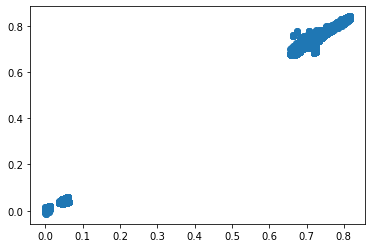

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
y_pred[:,0].shape

(43200, 1)

In [108]:
y_predict = y_pred.reshape(-1, 140)
y_predict.shape

(43200, 140)

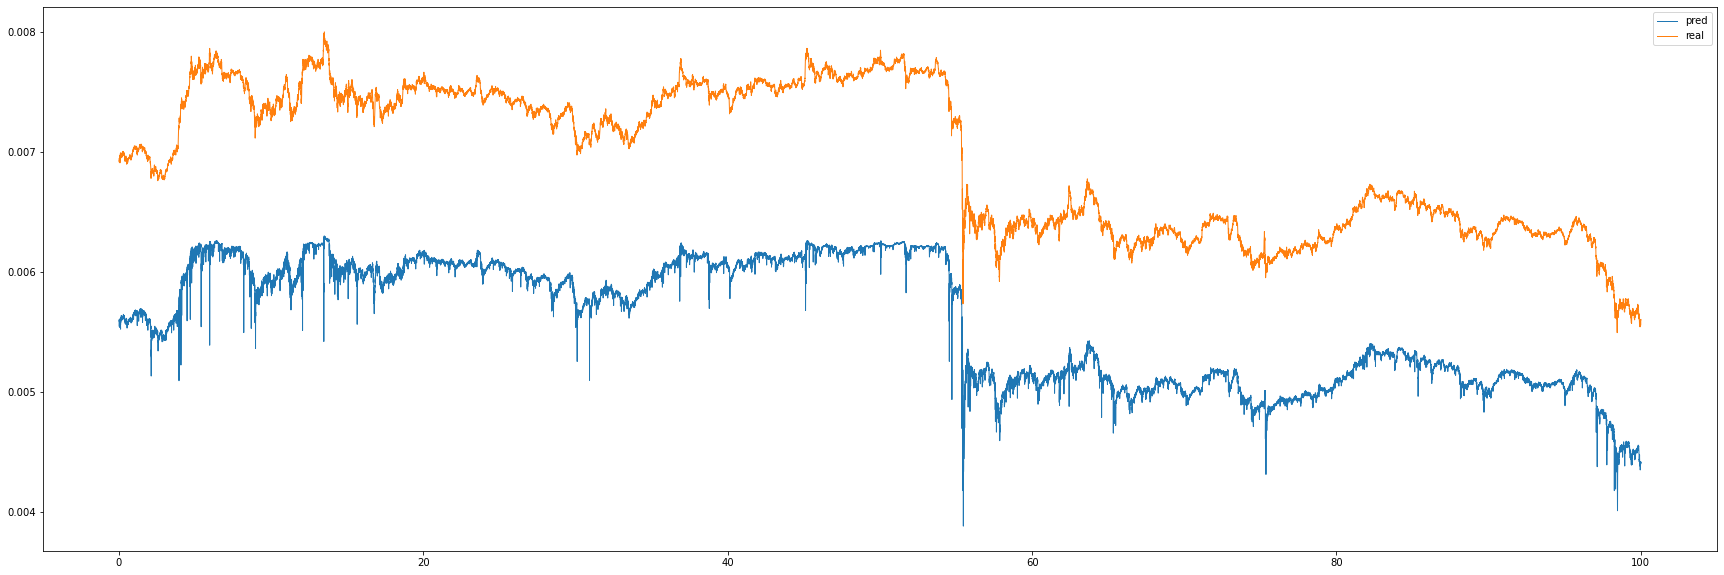

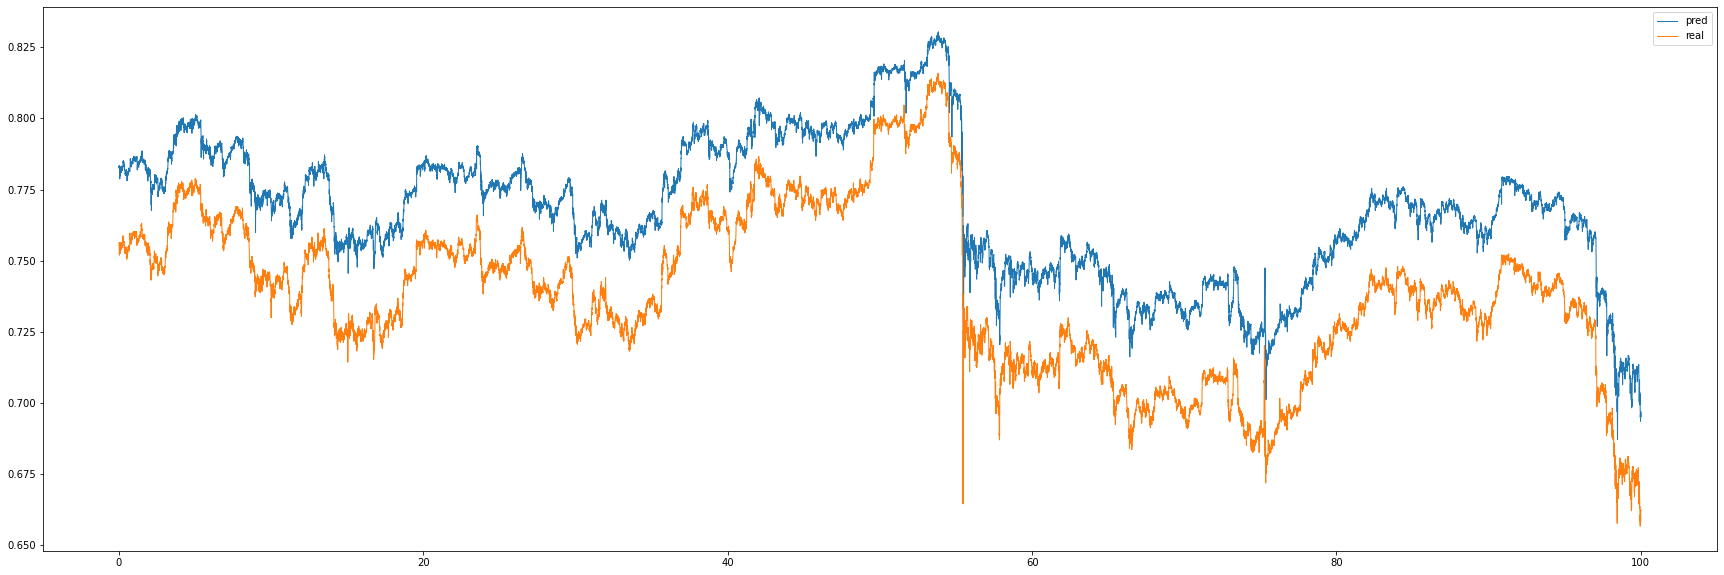

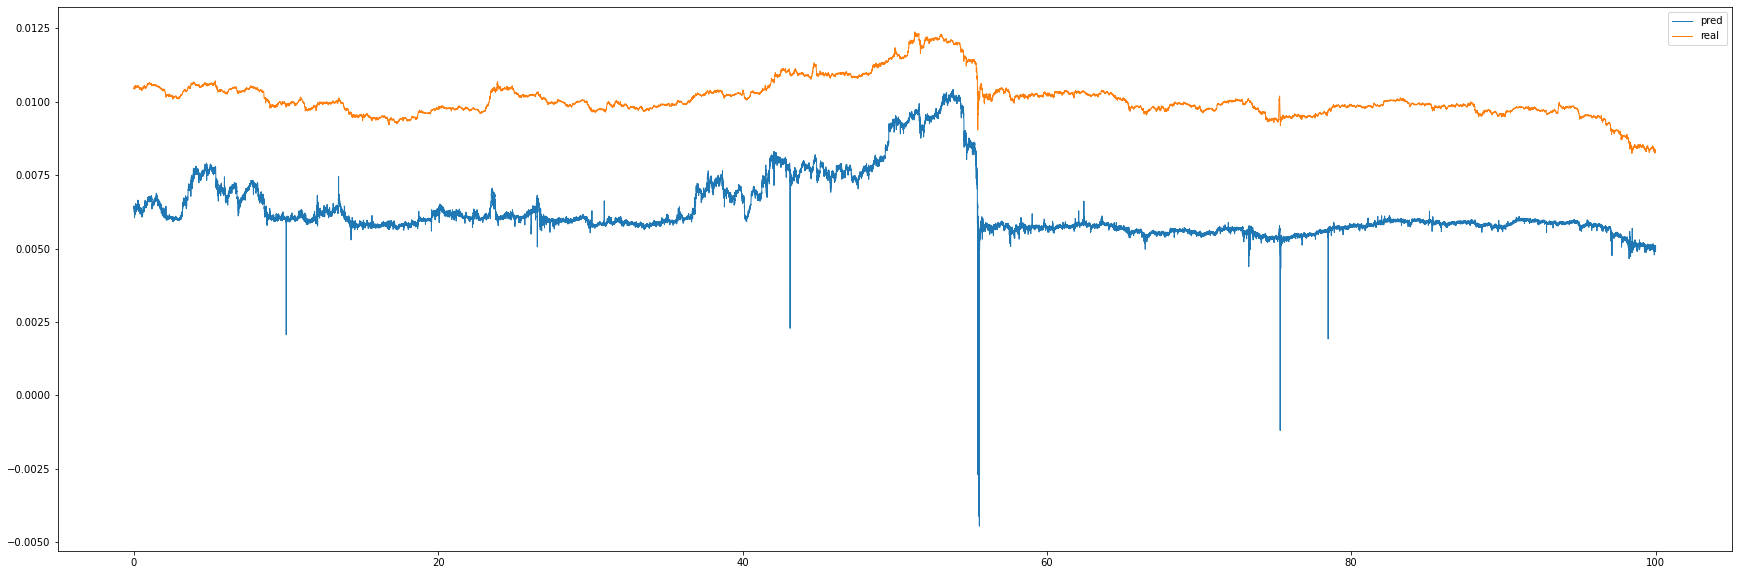

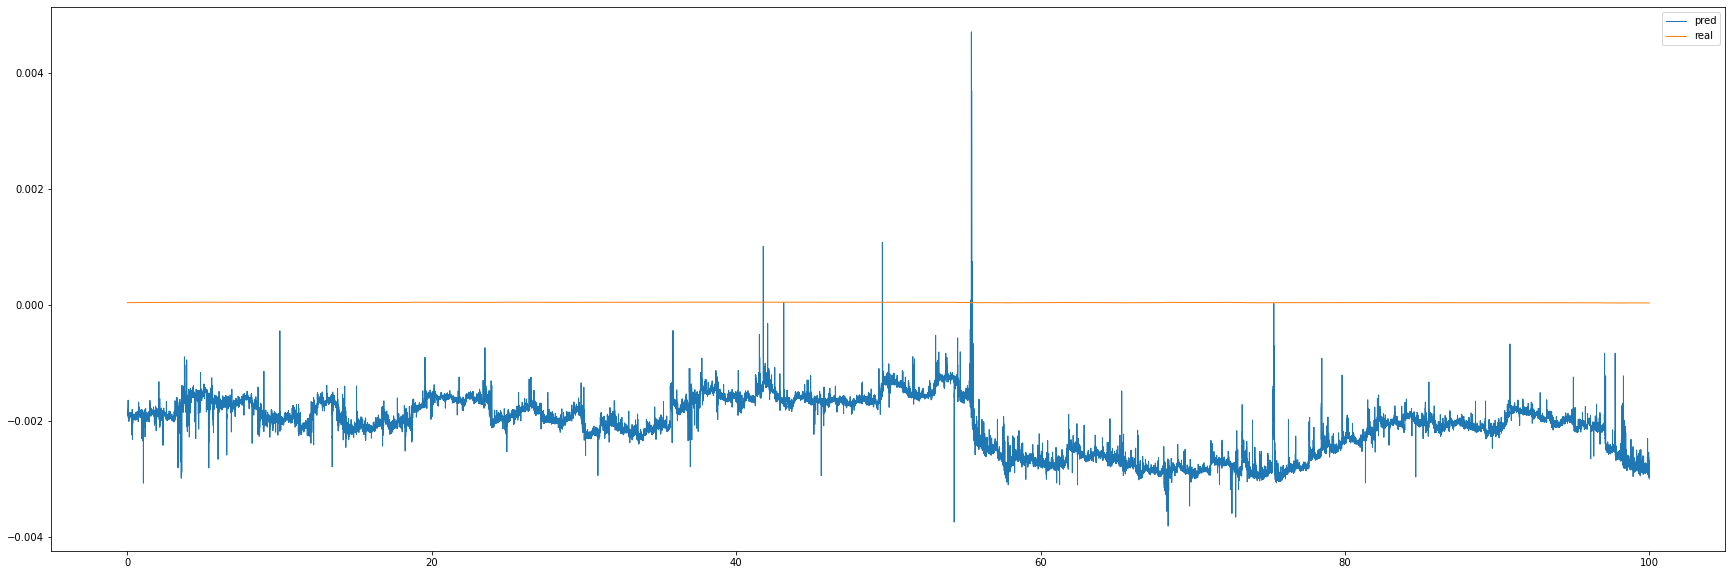

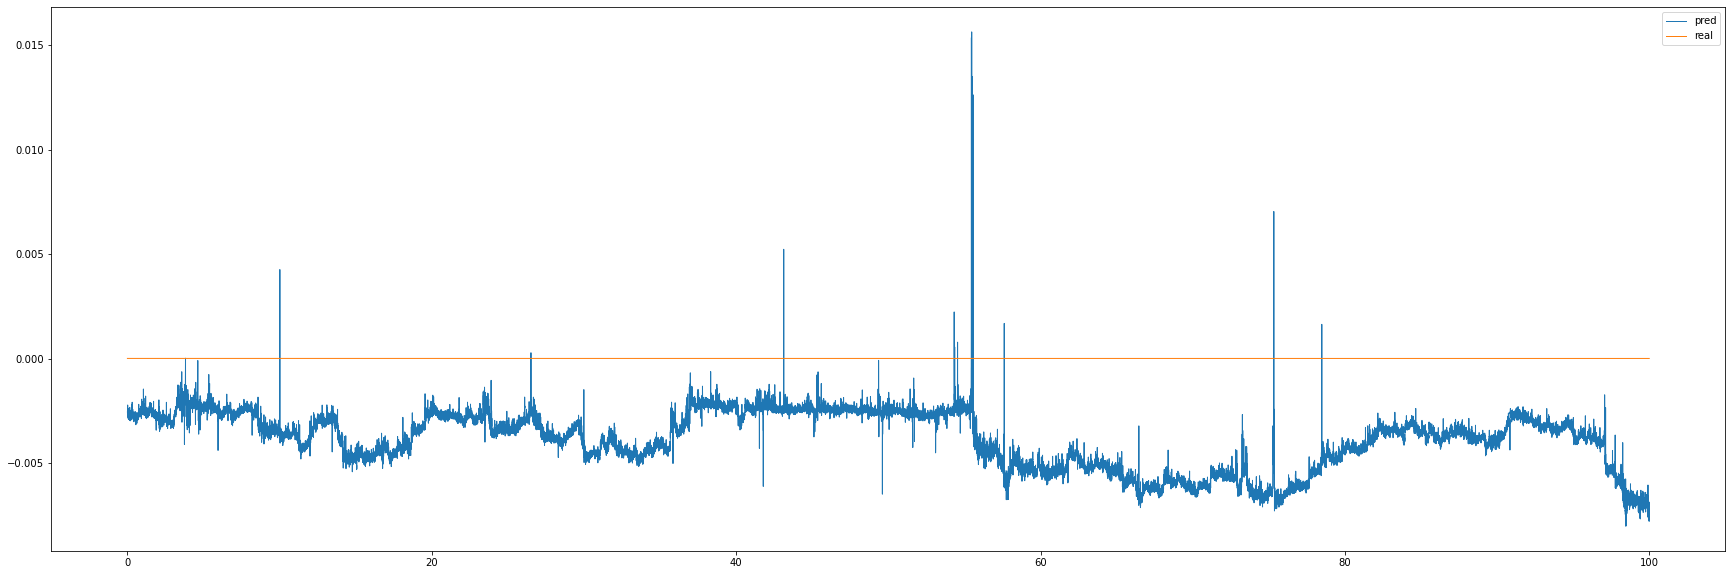

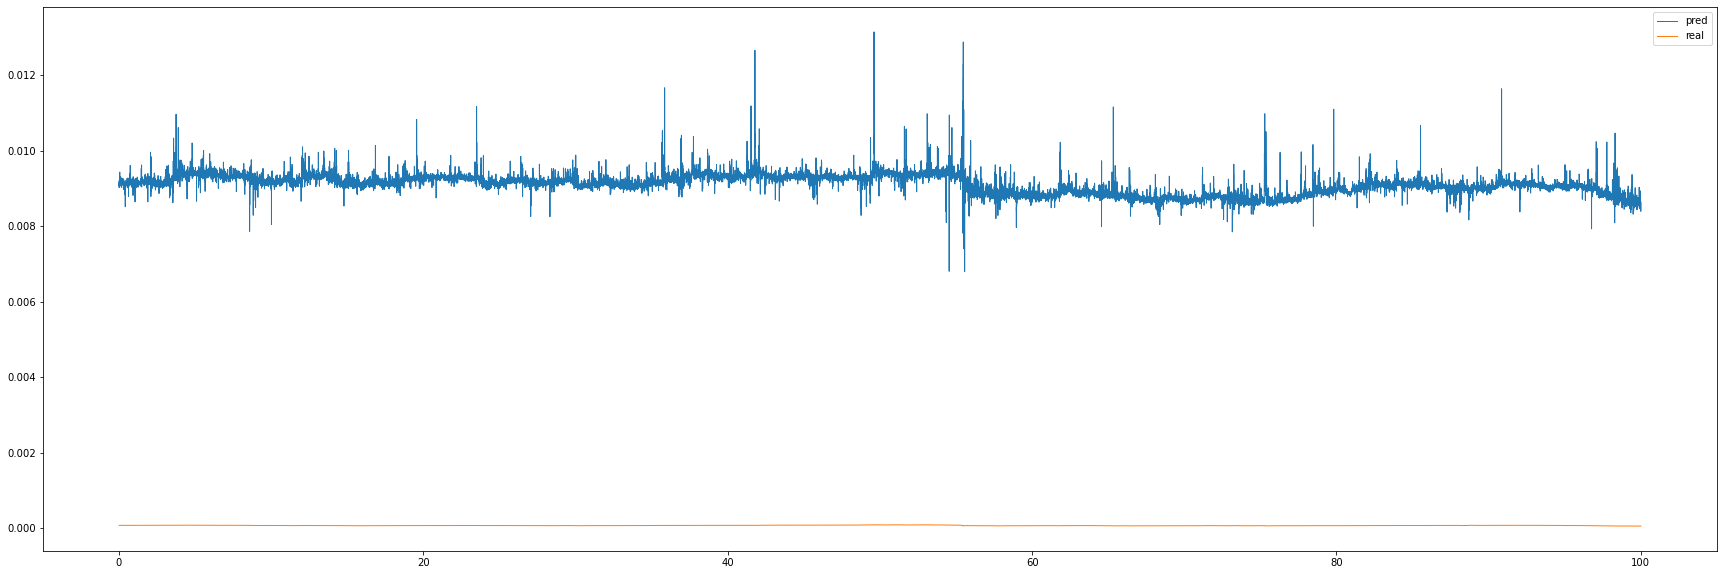

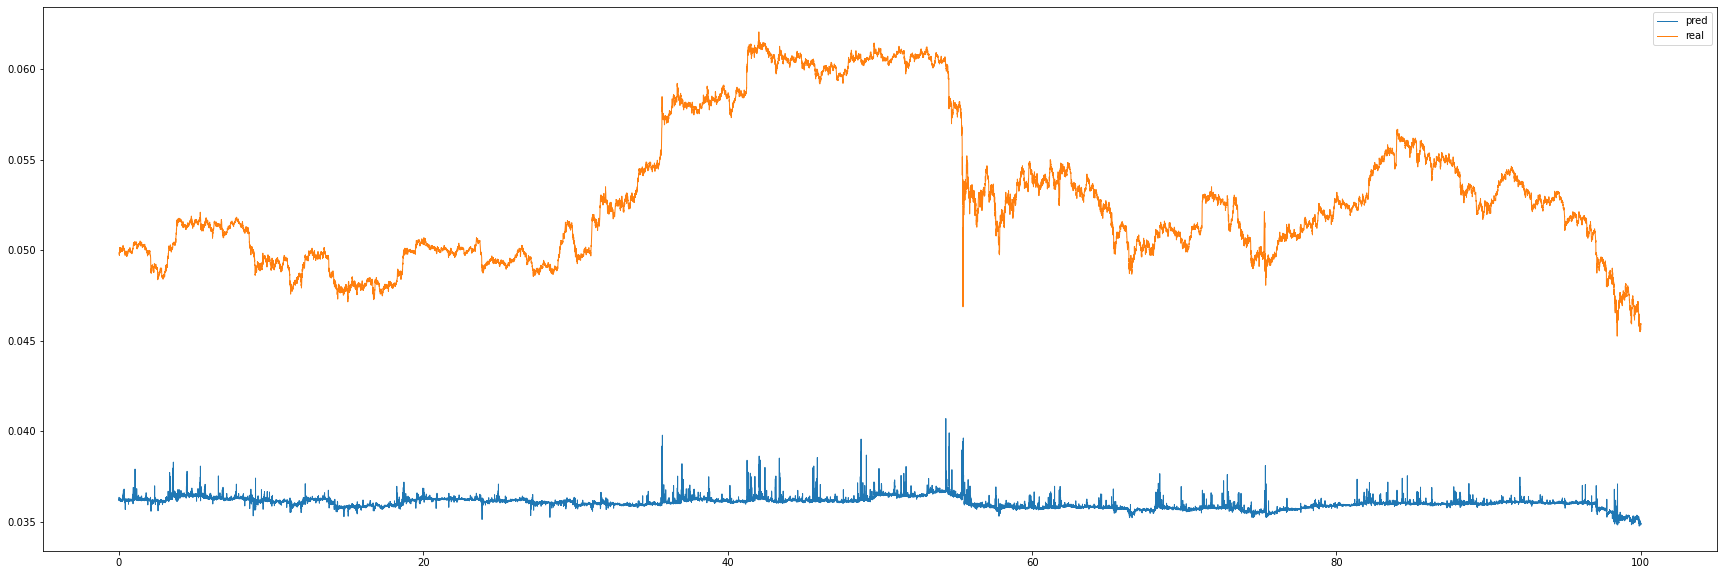

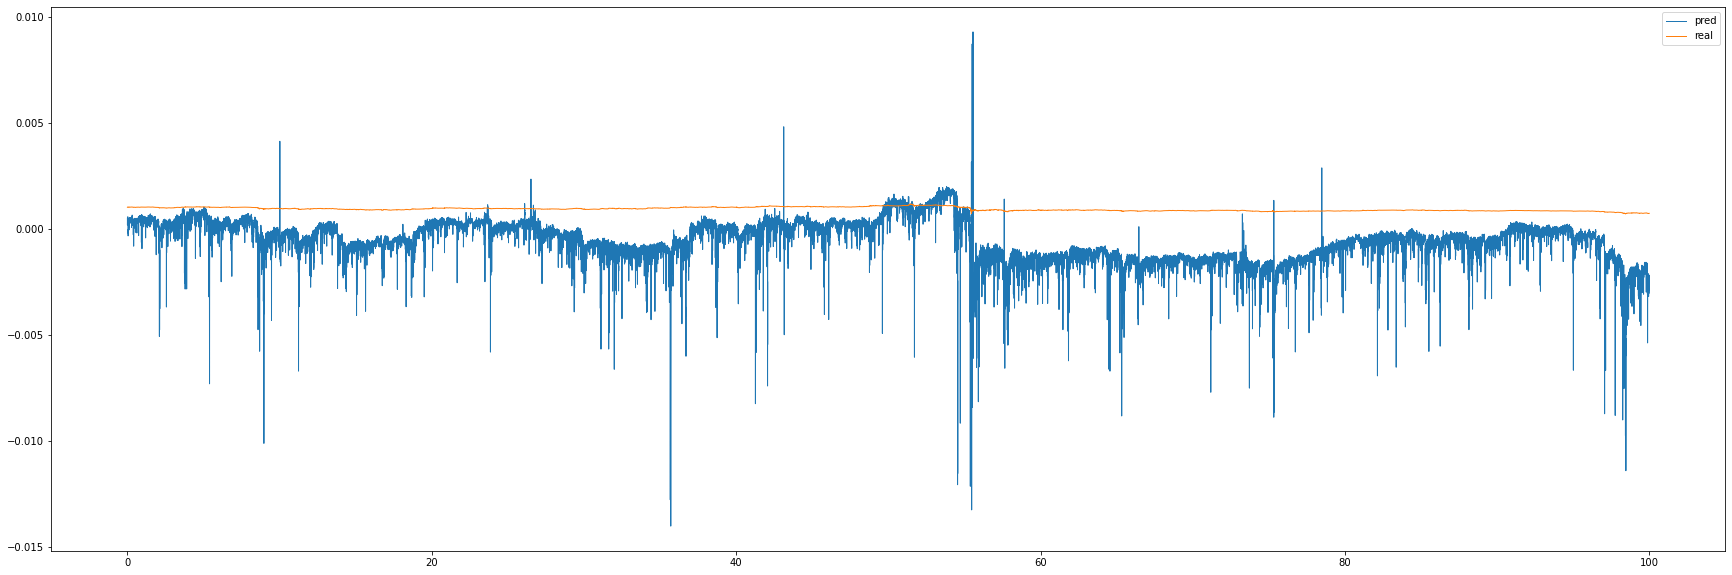

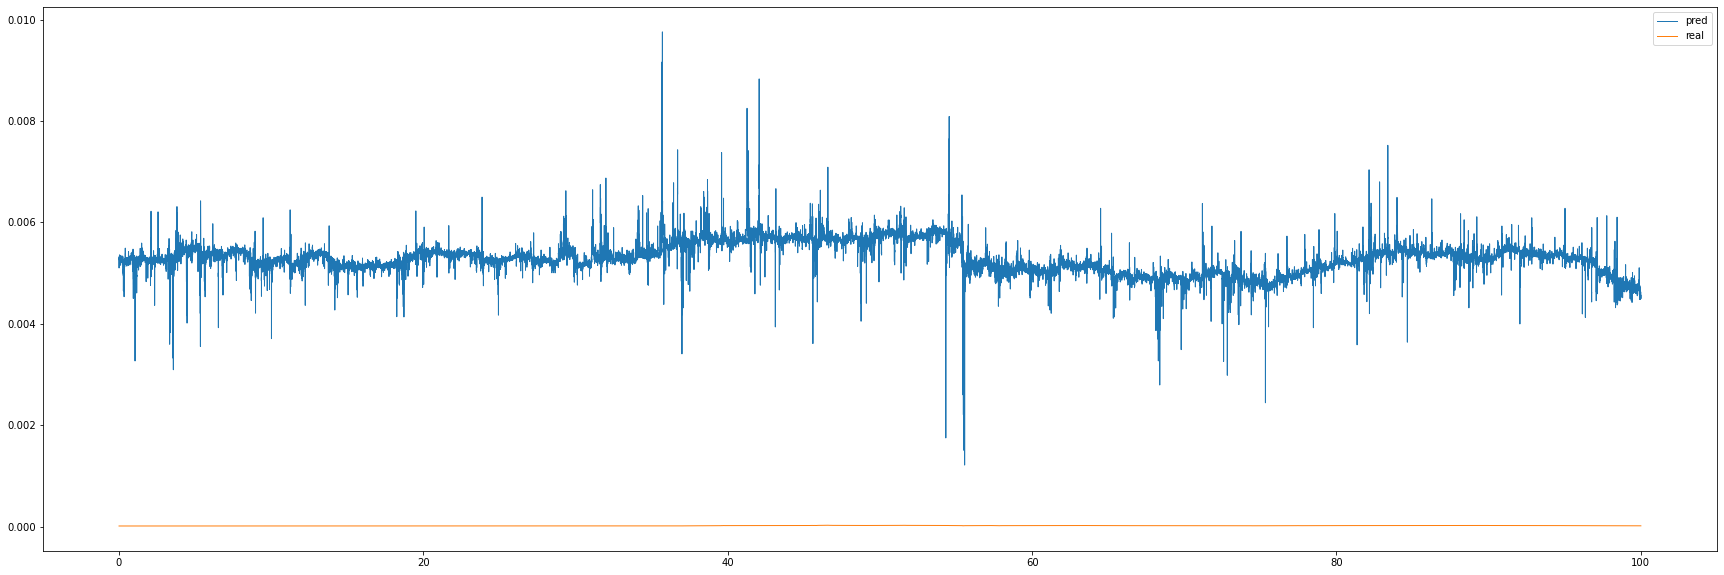

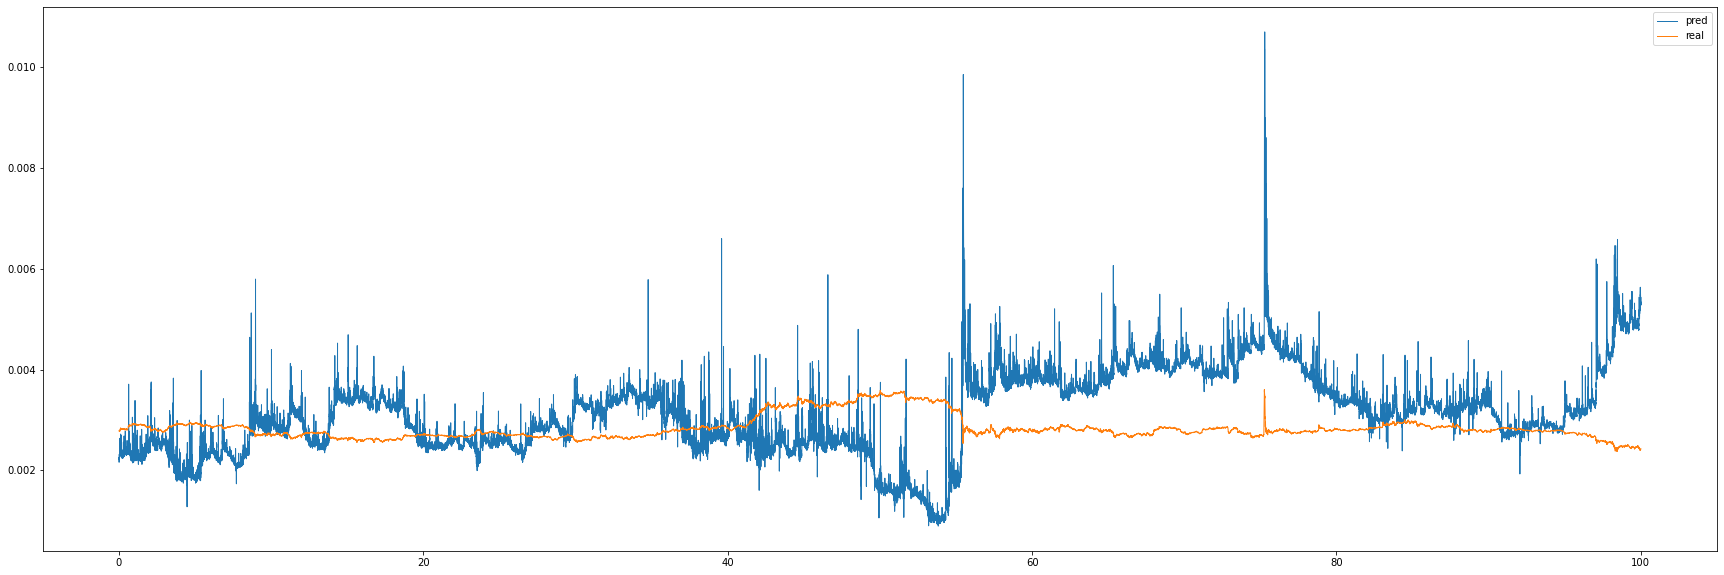

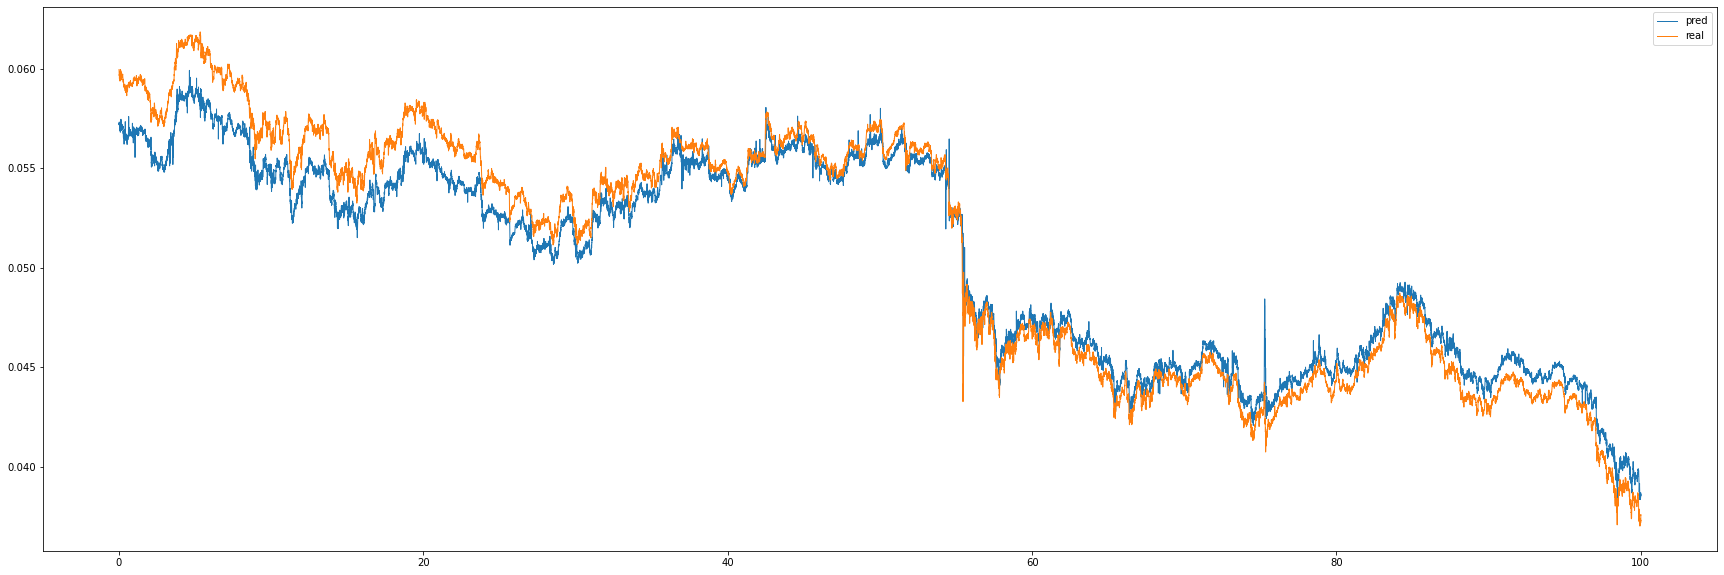

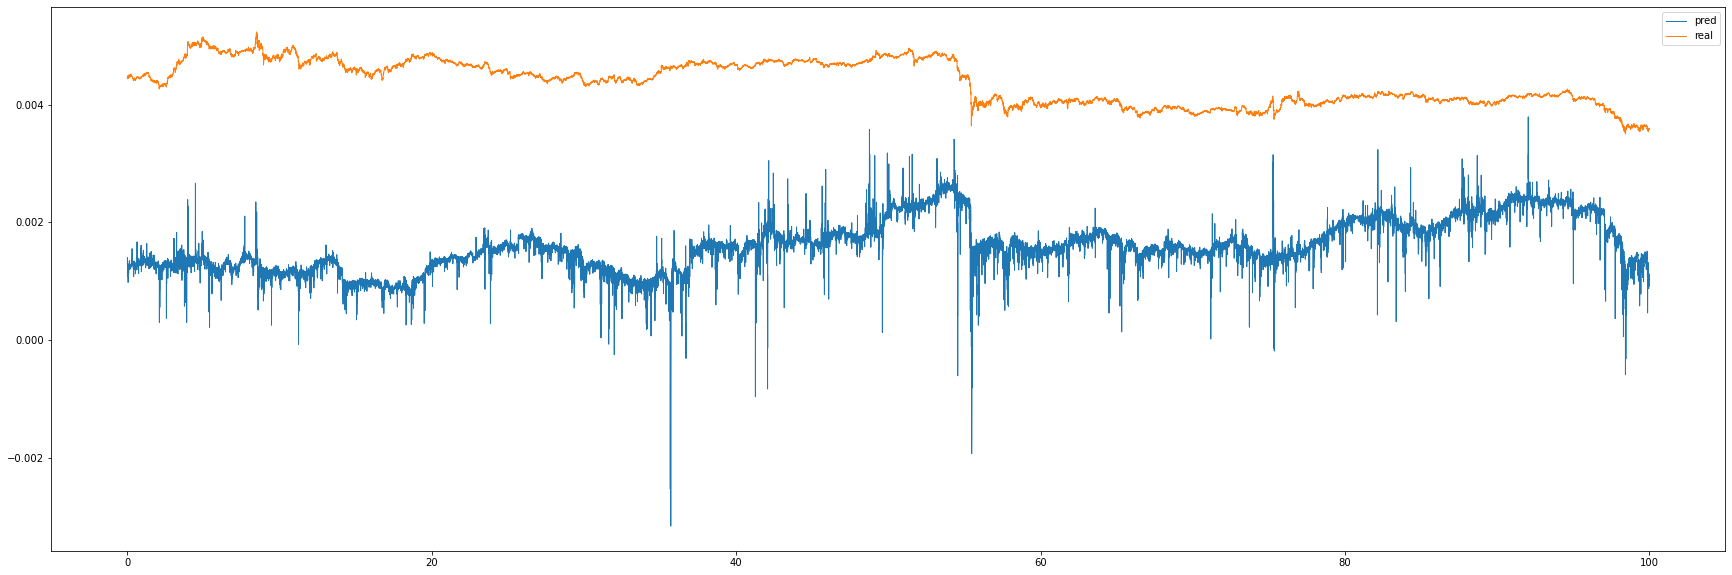

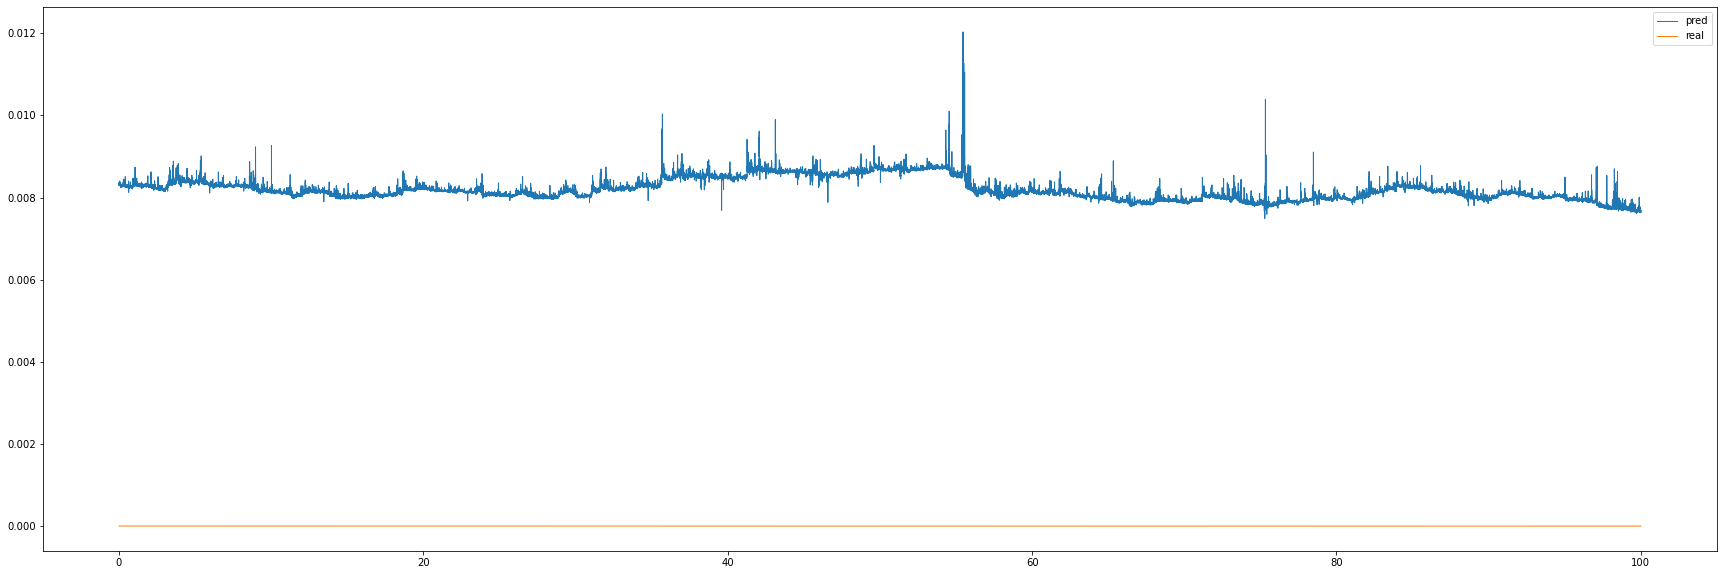

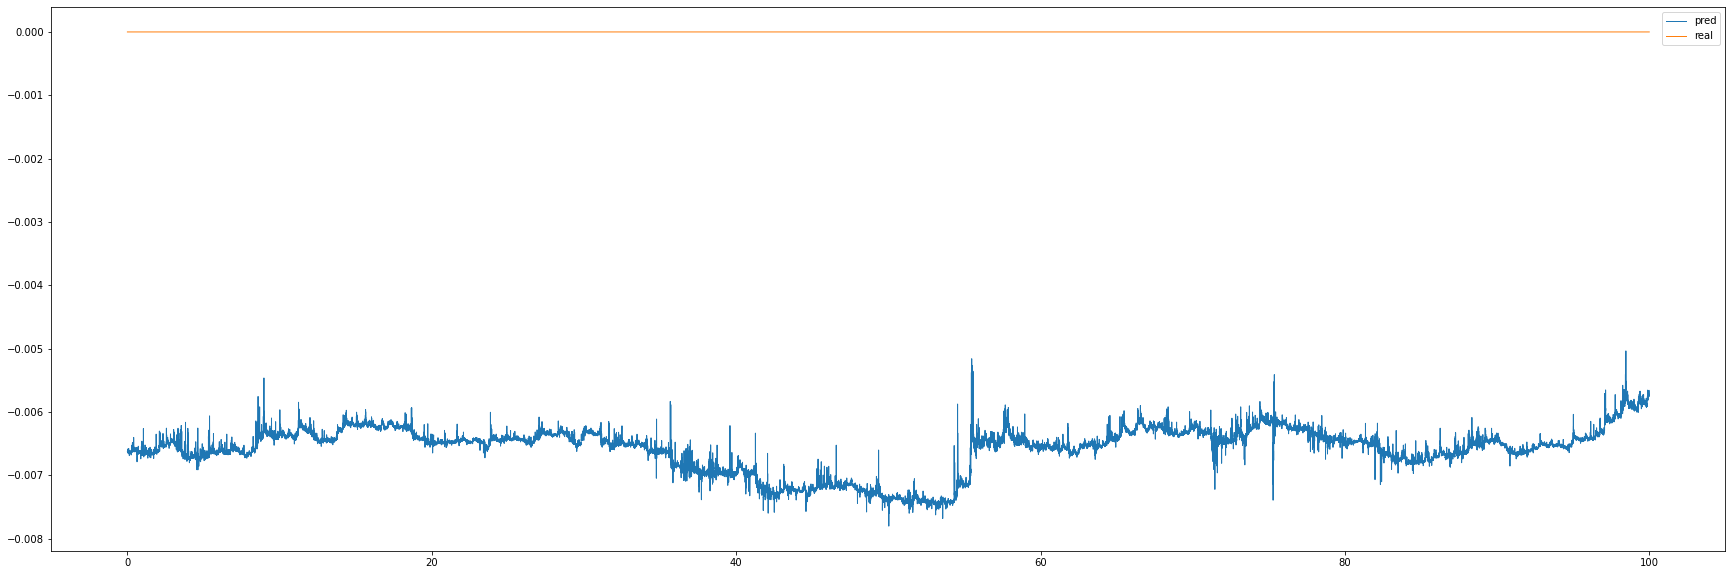

In [109]:
for i in range(14):
    asset_pred = y_predict[:, i]
    asset_real = y_valid[:,i]
    x_ = np.linspace(0,100, 43200)
    plt.figure(figsize=(30,10))
    plt.plot(x_, asset_pred, x_, asset_real, linewidth=1)
    plt.legend(['pred', 'real'])
    plt.show()